In [1]:
%%html
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

<html>
<body>


<dt>Thinkful Assignment</dt>
<dd>Unit 2 | Lesson 2 | Challenge 4</dd>

<ul>
    <li>Purpose: to show ability to draw logical inferences by visualizing data.</li>
    <li>Data: historical import and export data by country</li>
    <li>Source: the international monetary fund website</li>
    <li>By: AJ Igherighe | Aspiring Data Scientist</li>
    <li><b>Note:</b> This notebook focuses on visualizing the data and drawing inferences</li>
</ul>
<br>
<b>Assignment Milestones</b>
<ul>
    <li> Load cleaned dataset</li>
    <li> Select two countries to analyze in greater detail</li>
    <li> Create a series of visualizations (minimum of 4)</li>
    <li> Infer what each visualization says about the dataset</li>
</ul>

</body>
</html>

<html>
    <body>
        <dt>Import modules used in analysis</dt>
        <ul>
            <li>Pandas and numpy for data analysis</li>
            <li>Matplotlib and seaborn for visualization</li>
            <li>Other items to improve functionality of notebook</li>
        </ul>
    </body>
</html>

In [2]:
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np
import pandas as pd
import pickle
import seaborn
import copy

# display dataframe head and tail views as formatted tables
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

<html>
    <body>
        <dt>Load data</dt>
        <ul>
            <li>Read cleaned data into dataframe</li>
            <li>Use .head() to verify it is desired data</li>
        </ul>
    </body>
</html>

In [3]:
# load the cleaned dataframe
dataframe_filename = 'originaldataframe.pickle'
data_clean = pd.read_pickle(dataframe_filename)
data_clean.head()

# reset index to allow grouping and summing by year
data_clean = data_clean.reset_index()

,COUNTRY,FLOW,TRADE,FLOW_ADJ,TRADE_ADJ
YEAR,,,,,
2016,Afghanistan,Import,6534140413,Import,-6534140413
2016,Afghanistan,Export,596455337,Export,596455337
2015,Afghanistan,Import,7722865049,Import,-7722865049
2015,Afghanistan,Export,571404967,Export,571404967
2014,Afghanistan,Import,7697178170,Import,-7697178170


<html>
    <body>
        <dt>Focus analysis</dt>
        <ul>
            <li>Create a list of available countries</li>
            <li>Select two countries to examine</li>
            <li>Store countries in two new dataframes</li>
            <li>Use .head() to verify the desired data is captured</li>
        </ul>
    </body>
</html>

In [4]:
all_countries = list(pd.Series.unique(data_clean['COUNTRY'].copy()))
print(all_countries)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Isds', 'Central African Rep.', 'Chad', 'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros', 'Congo', 'Cook Isds', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Rep.', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'EU-28', 'Faeroe Isds', 'Fiji', 'Finland', 'Fmr Fed. Rep. of Germany', 'Fmr Sudan', 'France', 'French Guiana', 'French Polynesia', 'FS Micronesia', 'Gabon', 'Gambia'

<html>
    <body>
        <dt>Select countries</dt>
        <ul>
            <li>Create new dataframes with data from desired countries</li>
            <li>Use .head() to verify the desired data is captured</li>
        </ul>
    </body>
</html>

In [5]:
country1 = 'USA'
country2 = 'Sweden'

data_us = data_clean[data_clean.COUNTRY == country1].copy()
data_us.head()

data_swe = data_clean[data_clean.COUNTRY == country2].copy()
data_swe.head()

,YEAR,COUNTRY,FLOW,TRADE,FLOW_ADJ,TRADE_ADJ
8884,2016,USA,Import,2249660890432,Import,-2249660890432
8885,2016,USA,Export,1453167147951,Export,1453167147951
8886,2016,USA,Re-Export,223965303085,Export,223965303085
8887,2015,USA,Import,2313424569327,Import,-2313424569327
8888,2015,USA,Export,1501845863839,Export,1501845863839


,YEAR,COUNTRY,FLOW,TRADE,FLOW_ADJ,TRADE_ADJ
7946,2016,Sweden,Import,140725666141,Import,-140725666141
7947,2016,Sweden,Export,139610460248,Export,139610460248
7948,2015,Sweden,Import,138365394704,Import,-138365394704
7949,2015,Sweden,Export,140000674416,Export,140000674416
7950,2014,Sweden,Import,162257051136,Import,-162257051136


In [6]:
# compare exports
us_export_df = data_us[data_us.FLOW_ADJ == 'Export'].copy()
swe_export_df = data_swe[data_swe.FLOW_ADJ == 'Export'].copy()

grouped_us_exports = us_export_df.groupby('YEAR')['TRADE_ADJ'].sum() / 1000000000
grouped_swe_exports = swe_export_df.groupby('YEAR')['TRADE_ADJ'].sum() / 1000000000

In [7]:
def create_axes(adict):
    """takes a dictionary, sorts it, and returns ordered lists for x and y axes"""
    key_list = []
    value_list = []
    x = []
    y = []
    key_list = list(adict.keys())
    key_list.sort()
    # print(key_list)
    for key in key_list:
        x_entry = key
        y_entry = adict[key]
        # print(x_entry)
        # print(y_entry)
        x.append(x_entry)
        y.append(y_entry)
    return x, y

# get export values for plotting
us_export_dict = grouped_us_exports.to_dict()
swe_export_dict = grouped_swe_exports.to_dict()

us_xaxis, us_yaxis = create_axes(us_export_dict)
swe_xaxis, swe_yaxis = create_axes(swe_export_dict)

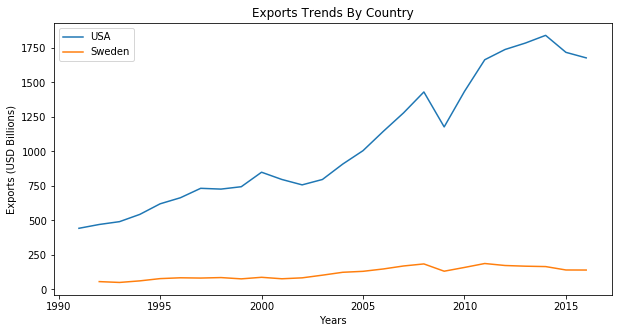

In [8]:
def create_linegraphs(xname, yname, title, name1, name2, x1, y1, x2, y2):
    """plots a line graph from 2 different data sources"""
    plt.figure(figsize=(10, 5))
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.title(title)
    line1 = plt.plot(x1,y1)
    line2 = plt.plot(x2, y2)
    plt.legend([name1, name2])
    plt.show()

the_x_label = 'Years'
the_y_label = 'Exports (USD Billions)'
graph_title = 'Exports Trends By Country'

# create line graphs
create_linegraphs(the_x_label, the_y_label, graph_title, country1, country2, us_xaxis, us_yaxis, swe_xaxis, swe_yaxis)

<dt>Line Graph Inferences</dt>
* The graph suggests the United States exports significantly more goods than Sweden
* The export gap between the two countries has increased significantly and appears to have reached a 15x+ difference by 2015
* Both countries' exports appear to ebb and flow in unison suggesting export drivers have become increasingly global over time 

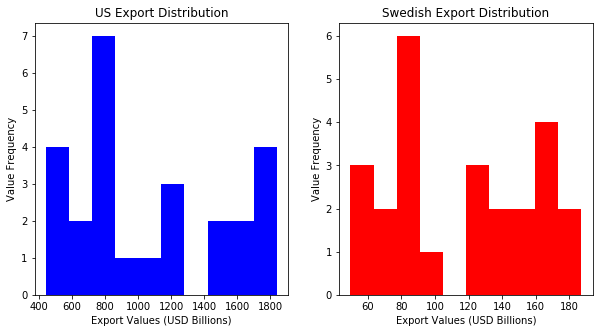

In [9]:
def create_histograms(xname, yname, title1, title2, y1, y2):
    """plots a line graph from 2 different data sources"""
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(y1, color='blue')    
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.title(title1)
    
    plt.subplot(1, 2, 2)
    plt.hist(y2, color='red')
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.title(title2)
    plt.show()

the_x_label = 'Export Values (USD Billions)'
the_y_label = 'Value Frequency'
graph_title1 = 'US Export Distribution'
graph_title2 = 'Swedish Export Distribution'

# create line graphs
create_histograms(the_x_label, the_y_label, graph_title1, graph_title2, us_yaxis, swe_yaxis)

<dt>Histogram Inferences</dt>
* This graph confirms our inference from the line graph that the US exports significantly more than Sweden
* Interestingly, these two histograms appear to show a similar frequency of hitting high values
* Finally, it appears that, although lower, Sweden's exports are less volatile

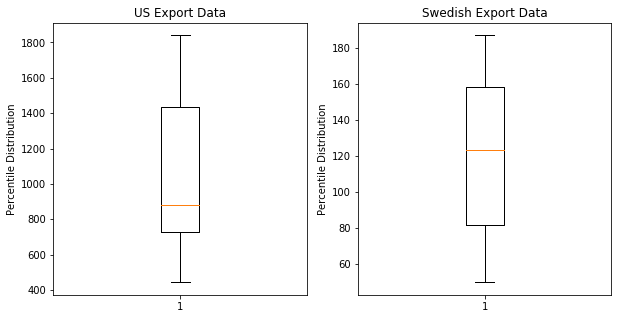

In [10]:
def create_boxplots(yname, title1, title2, y1, y2):
    """plots a line graph from 2 different data sources"""
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.ylabel(yname)
    plt.title(title1)
    plt.boxplot(y1)
    
    plt.subplot(1, 2, 2)
    plt.ylabel(yname)
    plt.title(title2)
    plt.boxplot(y2)
    plt.show()

the_y_label = 'Percentile Distribution'
graph_title1 = 'US Export Data'
graph_title2 = 'Swedish Export Data'

# create line graphs
create_boxplots(the_y_label, graph_title1, graph_title2, us_yaxis, swe_yaxis)

<dt>BoxPlot Inferences</dt>

* As with all the graphs thus far, this one shows the significant difference in exports but this time in percentiles
* As visual proof, US median exports appear to be approximately 900 billion USD while Swedish median exports appear to be approximately 130 billion USD
* The fact that the US exports median line is low compared to the overall rectangle shows that data is skewed with numerous outliers on the high side

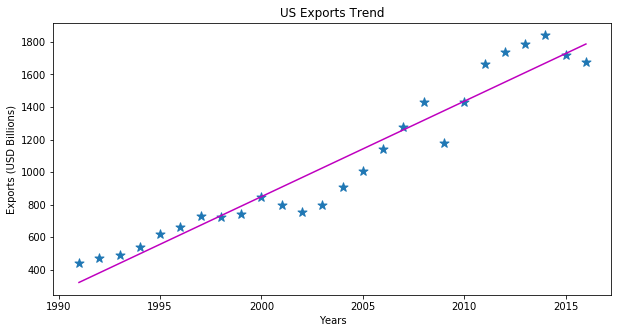

In [11]:
def create_scattergraph(xname, yname, title, x, y):
    """plots a line graph from 2 different data sources"""
    plt.figure(figsize=(10, 5))
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.title(title)
    plt.scatter(x, y, s=[90], marker='*')
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plb.plot(x, p(x), 'm-')
    plt.show()

the_x_label = 'Years'
the_y_label = 'Exports (USD Billions)'
graph_title = 'US Exports Trend'

# create line graphs
create_scattergraph(the_x_label, the_y_label, graph_title, us_xaxis, us_yaxis)

<dt>Scatterplot Inferences</dt>
* The most noticable thing from this graph is the trend line shows a steady increase in exports over time
* Exports drop significantly below the trendline in the early 2000s - likely in response to the 2000 .com crash
* However, between 2010 and 2015, exports significantly exceeded the trend line.  The decline after this period may suggest we are approaching another market correction.